In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
pip install keras

In [0]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# input image dimensions
img_rows, img_cols = 224, 224

# number of channels
img_channels = 1


In [0]:
pip install sklearn


In [0]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# input image dimensions
img_rows, img_cols = 224, 224

# number of channels
img_channels = 1

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# input image dimensions
img_rows, img_cols = 224, 224

# number of channels
img_channels = 1

In [0]:
#  data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#  data

path1 = '/content/drive/My Drive/wholedata'    #path of folder of images    
path2 = '/content/drive/My Drive/input_data_resize'  #path of folder to save images    

listing = os.listdir(path2)
num_samples=size(listing)
print(num_samples)



8264


In [0]:
for file in listing:
    im = Image.open(path1 + '//' + file)  
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here          
    gray.save(path2 +'//' +  file, "JPEG")

imlist = os.listdir(path2)

In [0]:
print(size(imlist))

In [0]:
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path2):
    for file in f:
        if '.png' in file:
            files.append(os.path.join(r, file))

for f in files:
    print(f)

/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-005.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-010.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-006.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-009.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-011.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-008.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-014.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-007.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-013.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-012.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-015.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-017.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-016.png
/content/drive/My Drive/input_data_resize/SOB_M_DC-14-16188-40-020.png
/conte

In [0]:
immatrix = array([array(Image.open('/content/drive/My Drive/input_data_resize'+ '//' + im2)).flatten()
              for im2 in imlist],'f')

In [0]:
label=np.ones((num_samples,),dtype = int)
label[0:159]=1
label[159:729]=0
label[729:6001]=1
label[6001:]=1

In [0]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

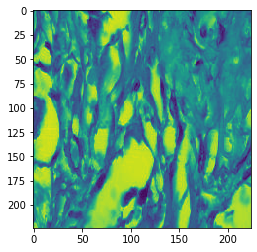

In [50]:
img=immatrix[100].reshape(img_rows,img_cols)
plt.imshow(img)

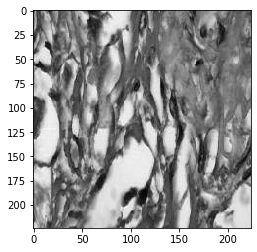

In [51]:
plt.imshow(img,cmap='gray')

In [52]:
print (train_data[0].shape)

(8264, 50176)


In [53]:
print (train_data[1].shape)

(8264,)


In [0]:
batch_size = 32
nb_classes = 2
nb_filters = 32
(X, y) = (train_data[0],train_data[1])



In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train[0])
print(X_test[0])
print(y_train[0])
print(y_test[0])

(6611, 50176)
(6611,)
(1653, 50176)
(1653,)
[164. 163. 162. ... 115. 118. 116.]
[164. 171. 179. ... 160. 166. 170.]
1
1


In [0]:
pixel_width=224
pixel_heigth=224

In [0]:
input_shape=(pixel_width,pixel_heigth,1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], pixel_width, pixel_heigth, 1)
X_test = X_test.reshape(X_test.shape[0], pixel_width, pixel_heigth, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


In [60]:
print(X_train[0])
print(y_train[5])

[[[0.6431373 ]
  [0.6392157 ]
  [0.63529414]
  ...
  [0.63529414]
  [0.627451  ]
  [0.6117647 ]]

 [[0.6392157 ]
  [0.6431373 ]
  [0.6392157 ]
  ...
  [0.6392157 ]
  [0.627451  ]
  [0.6156863 ]]

 [[0.6392157 ]
  [0.64705884]
  [0.64705884]
  ...
  [0.63529414]
  [0.627451  ]
  [0.6156863 ]]

 ...

 [[0.8       ]
  [0.8392157 ]
  [0.8666667 ]
  ...
  [0.40392157]
  [0.43137255]
  [0.44313726]]

 [[0.8       ]
  [0.8392157 ]
  [0.8627451 ]
  ...
  [0.41960785]
  [0.4392157 ]
  [0.4392157 ]]

 [[0.8       ]
  [0.8352941 ]
  [0.85490197]
  ...
  [0.4509804 ]
  [0.4627451 ]
  [0.45490196]]]
1


In [112]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(Y_train[5])

[0. 1.]


In [62]:
from keras.layers import Conv2D,MaxPooling2D,Dense, Dropout, Flatten

model = Sequential()

In [63]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
print("Post MaxPool",model.output_shape)

model.add(Dropout(0.5))
print("Post DropOut",model.output_shape)

model.add(Flatten())
print("Post Flattern:",model.output_shape)

model.add(Dense(128,activation='relu'))
print("POST Dense:",model.output_shape)

model.add(Dense(2,activation='softmax'))
print("POST Dense2:",model.output_shape)




Post MaxPool (None, 111, 111, 32)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Post DropOut (None, 111, 111, 32)
Post Flattern: (None, 394272)
POST Dense: (None, 128)
POST Dense2: (None, 2)


In [64]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [66]:
hist=model.fit(X_train,Y_train,batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_test,Y_test))
score=model.evaluate(X_test,Y_test,verbose=0)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

Train on 6611 samples, validate on 1653 samples
Epoch 1/5
6611/6611 [==============================] - 30s 5ms/step - loss: 1.0654 - acc: 0.9339 - val_loss: 1.2969 - val_acc: 0.9195
Epoch 2/5
6611/6611 [==============================] - 30s 5ms/step - loss: 1.0654 - acc: 0.9339 - val_loss: 1.2969 - val_acc: 0.9195
Epoch 3/5
6611/6611 [==============================] - 30s 5ms/step - loss: 1.0654 - acc: 0.9339 - val_loss: 1.2969 - val_acc: 0.9195
Epoch 4/5
6611/6611 [==============================] - 30s 5ms/step - loss: 1.0654 - acc: 0.9339 - val_loss: 1.2969 - val_acc: 0.9195
Epoch 5/5
6611/6611 [==============================] - 30s 5ms/step - loss: 1.0654 - acc: 0.9339 - val_loss: 1.2969 - val_acc: 0.9195
Test Score: 1.296858324329564
Test Accuracy: 0.9195402299571744


In [67]:
print(model.predict_classes(X_test[1:5]))

[1 1 1 1]


In [68]:
print(Y_test[1:5])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

In [0]:

model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.0001),metrics=['accuracy'])

In [85]:
hist=model.fit(X_train,Y_train,batch_size=batch_size,epochs=2,verbose=1,validation_data=(X_test,Y_test))
score=model.evaluate(X_test,Y_test,verbose=0)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

Train on 6611 samples, validate on 1653 samples
Epoch 1/2
6611/6611 [==============================] - 65s 10ms/step - loss: 0.2889 - acc: 0.9312 - val_loss: 0.3203 - val_acc: 0.9195
Epoch 2/2
6611/6611 [==============================] - 64s 10ms/step - loss: 0.2592 - acc: 0.9339 - val_loss: 0.2713 - val_acc: 0.9195
Test Score: 0.27126097039100405
Test Accuracy: 0.9195402299571744


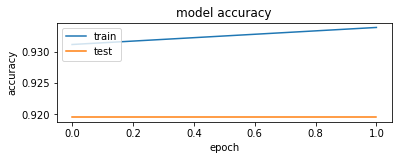

In [87]:
import matplotlib.pyplot as plt
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(hist.history['acc'])  
plt.plot(hist.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   


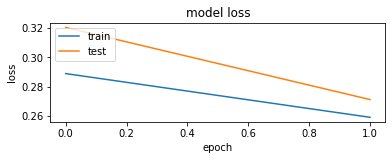

In [88]:
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(hist.history['loss'])  
plt.plot(hist.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

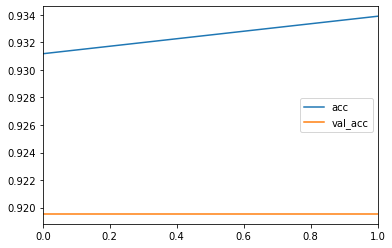

In [90]:
import pandas as pd
history_df = pd.DataFrame(hist.history)
history_df[['acc', 'val_acc']].plot()

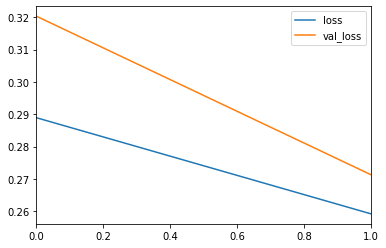

In [92]:
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()

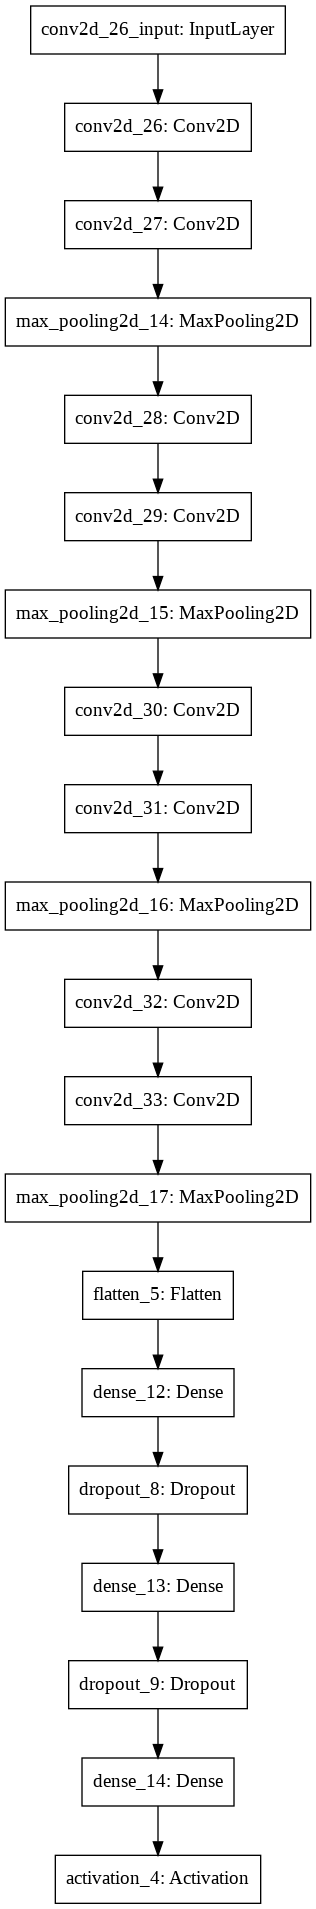

In [104]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
Y_pred = model.predict(X_test)

In [114]:
print(Y_pred)

[[0.04453966 0.9652573 ]
 [0.10791412 0.90853965]
 [0.06822437 0.94457066]
 ...
 [0.04574284 0.9642352 ]
 [0.04380164 0.96588826]
 [0.04341559 0.966238  ]]


In [115]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[1 1 1 ... 1 1 1]


In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

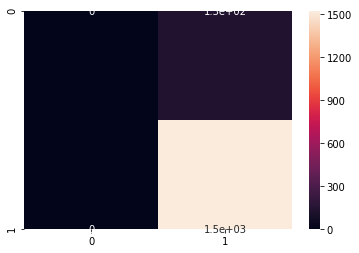

In [122]:
import seaborn as sns

sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [123]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 2666.666666666667%
